In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Text(0.5, 1.0, 'Signaali')

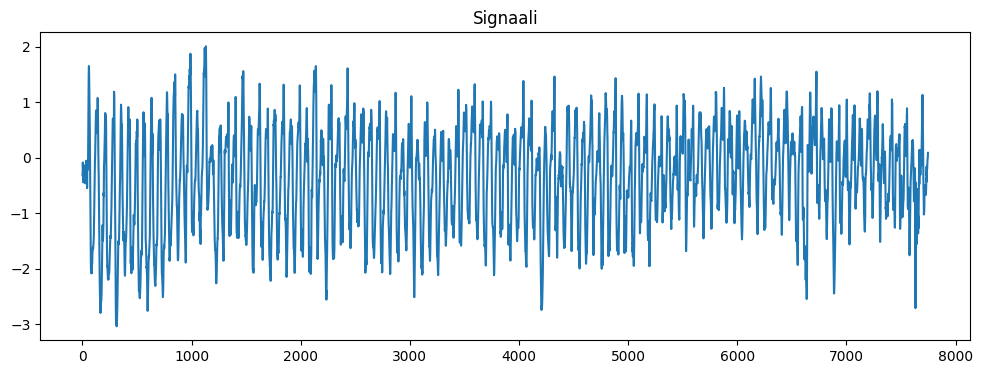

In [71]:
df = pd.read_csv('signaali.csv')
time = df['Aika'].values
signal = df['Signaali'].values
plt.figure(figsize=(12, 4))
plt.plot(signal)
plt.title('Signaali')

Text(0, 0.5, 'Teho')

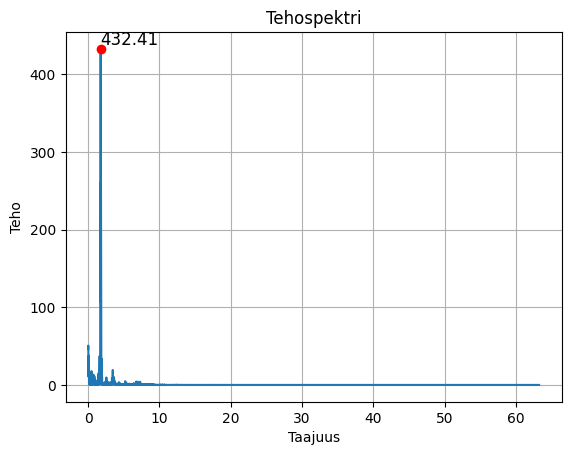

In [72]:
N = len(signal)
dt = time[1] - time[0]
fourier = np.fft.fft(signal, N)
psd = fourier * np.conj(fourier) / N
freq = 1/(dt*N) * np.arange(N)
L = np.arange(1, np.floor(N/2), dtype='int')
PSD = np.array([freq[L], psd[L].real])
max_teho_index = np.argmax(PSD[1, :])
max_taajuus = PSD[0, max_teho_index]
max_teho = PSD[1, max_teho_index]
plt.plot(PSD[0,:], PSD[1,:])
plt.plot(max_taajuus, max_teho, 'ro', label=f'Teho: {max_teho:.2f} \nTaajuus: {max_taajuus:.2f} Hz')
plt.text(max_taajuus, max_teho, f'{max_teho:.2f}', fontsize=12, ha='left', va='bottom')
plt.grid()
plt.title('Tehospektri')
plt.xlabel('Taajuus')
plt.ylabel('Teho')